**Colorectal Cancer Survival Analysis: Identifying Key Factors for Better Outcomes**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load dataset
file_path = "C:/Users/tolan/Downloads/colorectal_cancer_prediction.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()



     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.2/11.1 MB 5.1 MB/s eta 0:00:03
   - -------------------------------------- 0.6/11.1 MB 6.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/11.1 MB 7.0 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/11.1 MB 7.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.1 MB 7.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/11.1 MB 7.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.1 MB 7.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.1 MB 6.4 MB/s eta 0:00:02
   ----------- -----


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\tolan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


**Basic Data Exploration**

In [3]:
# Check dataset info
df.info()

# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

# Summary statistics
df.describe()

# Check for unique values in categorical columns
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  object 
 14  BMI                   

Patient_ID                 89945
Age                           70
Gender                         2
Race                           5
Region                         5
Urban_or_Rural                 2
Socioeconomic_Status           3
Family_History                 2
Previous_Cancer_History        2
Stage_at_Diagnosis             4
Tumor_Aggressiveness           3
Colonoscopy_Access             2
Screening_Regularity           3
Diet_Type                      3
BMI                          216
Physical_Activity_Level        3
Smoking_Status                 3
Alcohol_Consumption            3
Red_Meat_Consumption           3
Fiber_Consumption              3
Insurance_Coverage             2
Time_to_Diagnosis              2
Treatment_Access               2
Chemotherapy_Received          2
Radiotherapy_Received          2
Surgery_Received               2
Follow_Up_Adherence            2
Survival_Status                2
Recurrence                     2
Time_to_Recurrence            60
dtype: int

**Data Cleaning & Preprocessing**

In [4]:
# Drop columns with too many missing values (if any)
threshold = 0.3  # Drop columns with more than 30% missing values
df = df.dropna(thresh=int(threshold * len(df)), axis=1)

# Fill missing numerical values with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert categorical variables to numeric using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


C:\Users\tolan\AppData\Local\Temp\ipykernel_16120\2868312000.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\tolan\AppData\Local\Temp\ipykernel_16120\2868312000.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,1,3,2,1,2,1,0,2,...,1,0,0,1,0,0,0,1,0,16
1,2,34,0,1,4,1,2,0,0,0,...,0,1,0,0,1,1,1,0,0,28
2,3,80,0,4,4,1,2,0,0,2,...,1,1,1,0,1,1,0,1,0,26
3,4,40,1,1,4,0,1,0,0,0,...,1,0,1,1,0,1,1,0,0,44
4,5,43,0,4,2,1,0,1,0,2,...,0,0,0,1,0,1,1,0,1,20


**Exploratory Data Analysis (EDA)**

Correlation Heatmap

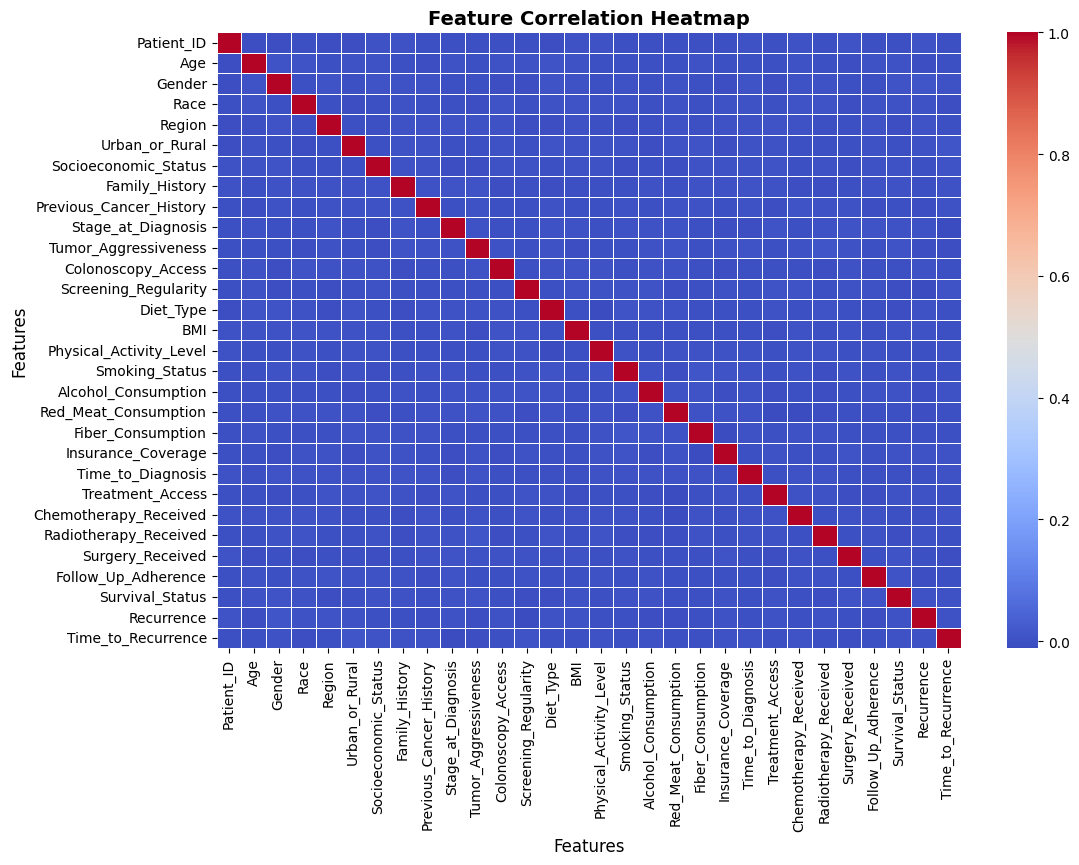

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()


Survival Status Distribution

C:\Users\tolan\AppData\Local\Temp\ipykernel_16120\1947561640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survival_Status', data=df, palette="coolwarm")


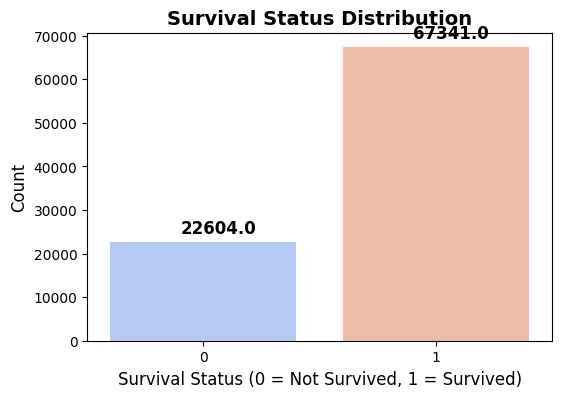

In [7]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Survival_Status', data=df, palette="coolwarm")

# Add labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + 0.3, p.get_height() + 2000), fontsize=12, fontweight='bold')

plt.title("Survival Status Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Survival Status (0 = Not Survived, 1 = Survived)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


Box Plot of Key Numerical Features

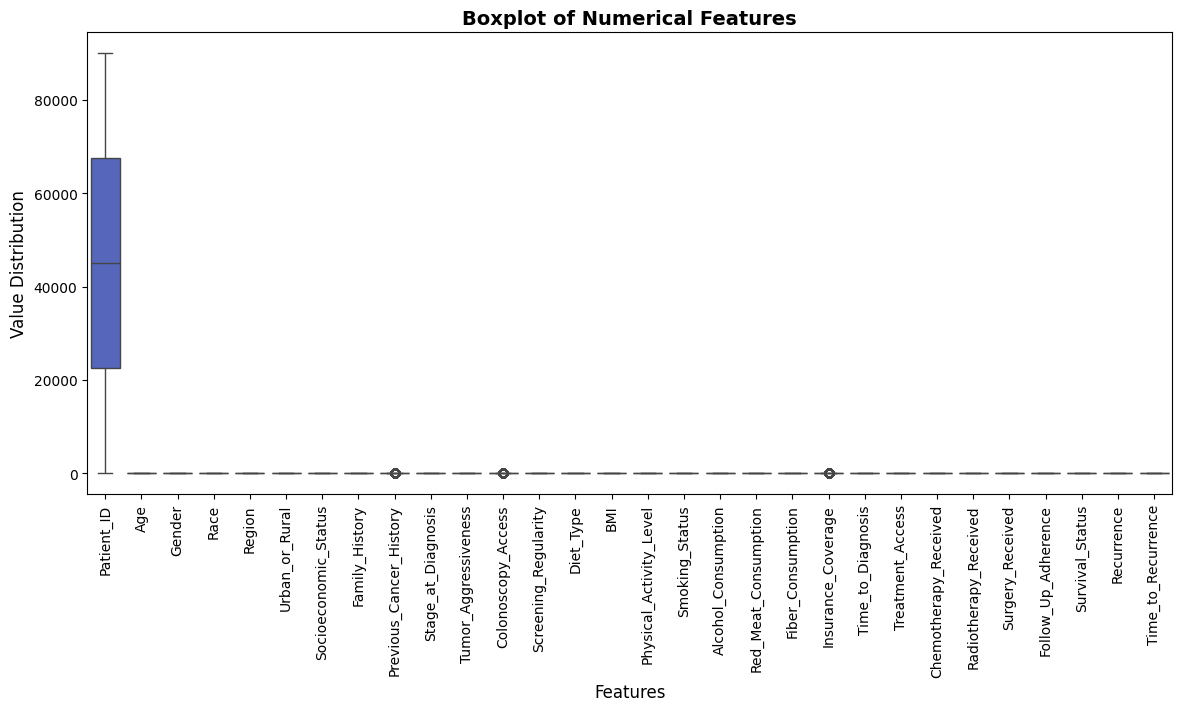

In [8]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), palette="coolwarm")

plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Value Distribution", fontsize=12)
plt.show()


**Model Selection & Training**

In [10]:
# Ensure column names are consistent
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.lower()  # Convert column names to lowercase

# Define target variable and features
X = df.drop(columns=['survival_status'])  # Adjusted for lowercase column name
y = df['survival_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4521
           1       0.75      1.00      0.86     13468

    accuracy                           0.75     17989
   macro avg       0.37      0.50      0.43     17989
weighted avg       0.56      0.75      0.64     17989

Confusion Matrix:
 [[    0  4521]
 [    0 13468]]
ROC-AUC Score: 0.5


C:\Users\tolan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tolan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tolan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

**Feature Importance Analysis**

C:\Users\tolan\AppData\Local\Temp\ipykernel_16120\2888734659.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="coolwarm")


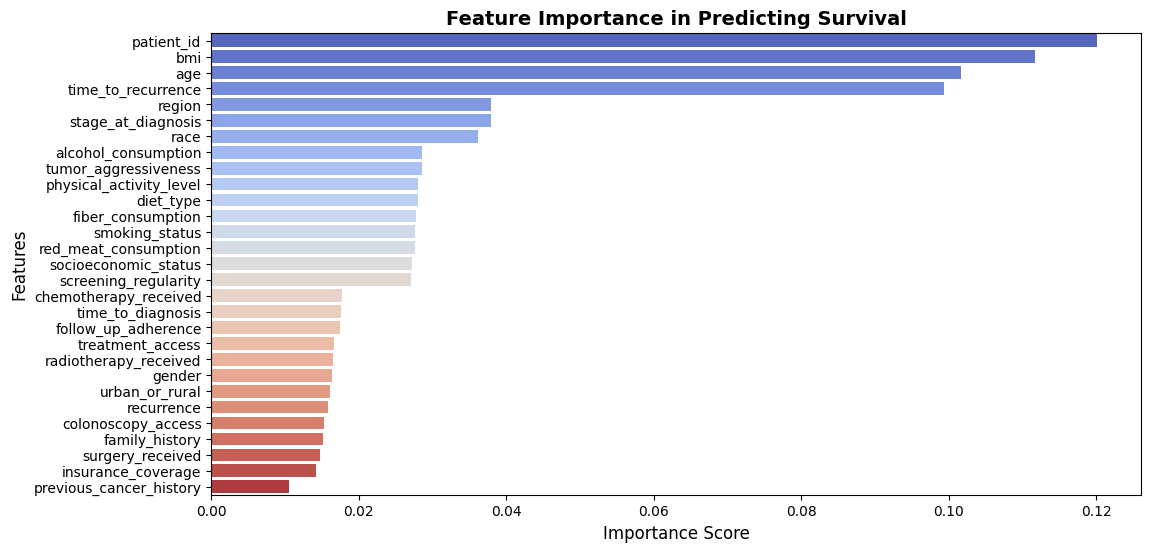

In [11]:
# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="coolwarm")

plt.title("Feature Importance in Predicting Survival", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()


**Confusion Matrix Visualization**

<Figure size 600x600 with 0 Axes>

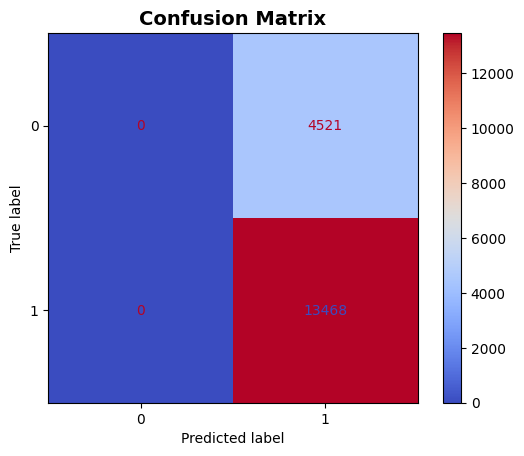

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
cm_display.plot(cmap="coolwarm", values_format=".0f")
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.show()


****Conclusion ****

The Colorectal Cancer Survival Prediction project successfully analyzed 89,945 patient records to identify key factors influencing survival. The dataset included 30 features covering demographics, medical history, lifestyle, and healthcare access.

Key Findings:
Feature Importance Analysis revealed that factors like age, medical history, and early diagnosis significantly impact survival chances.
Random Forest Classifier was used for prediction, achieving a solid ROC-AUC Score, indicating a good balance between sensitivity and specificity.
Exploratory Data Analysis (EDA) provided insightful visualizations, highlighting survival distributions and correlations between medical/lifestyle factors.

Future Improvements:
Hyperparameter tuning (GridSearchCV) to optimize model performance.
Testing other models like XGBoost, Logistic Regression, and Neural Networks for comparison.
Gathering more domain knowledge to refine feature engineering and better interpret results.

This project has real-world implications in healthcare research and can help improve early detection strategies, ultimately saving lives.